# `Cartopy` 地图绘制（1）
![](https://scitools.org.uk/cartopy/docs/latest/_static/cartopy.png)

**Carto**graphy **Py**thon

------------------------
主讲人：李显祥

大气科学学院

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

%matplotlib inline

In [2]:
import cartopy

print(cartopy.__version__)

0.18.0


In [3]:
cartopy.config.values()

dict_values(['', '/Users/lixx/.local/share/cartopy', '/opt/miniconda3/lib/python3.7/site-packages/cartopy/data', {('shapefiles', 'natural_earth'): <cartopy.io.shapereader.NEShpDownloader object at 0x7fcec154a790>, ('shapefiles', 'gshhs'): <cartopy.io.shapereader.GSHHSShpDownloader object at 0x7fcec1633050>}])

`Cartopy` 用于基于地图的数据可视化。它依赖于以下包：

- `matplotlib`
- `numpy`
- `proj4`
- `shapely`

它取代 `Basemap`，但是还没有完全实现 `Basemap` 的所有功能。

## 投影 Projection

<table width='100%'><tr><td width='50%'><img src='China_map_mercator.png' width='400' algin='right'/></td><td width='50%'><img src='China_map_Lambert.png' width='400' align='left'/></td></tr></table>

- 为了将地球（或者地球的一部分）画到平面上（纸上或者屏幕上），我们需要投影（Projections）。

- `Cartopy` 通过 `crs` 子模块提供了很多不同的投影法。

- `Cartopy` 依赖于 `matplotlib`, 每一种投影方法会创建 `matplotlib` `Axes`（或者 `AxesSubplot`）用来绘制数据。

- 投影创建的 `Axes` 是一个 `cartopy.mpl.geoaxes.GeoAxes` 对象。 这个 `Axes` 子类重载（override）了 `matplotlib` 的一些方法，并添加了一些非常有用的方法，尤其是用来绘制地图的方法。

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  if __name__ == '__main__':
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  # This is added back by InteractiveShellApp.init_path()
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The default value for the *approx* keyword argument to OSNI will change from True to False after 0.18.
/opt/miniconda3/lib/python3.7/site-packages/cartopy/mpl/feature_artist.py:154: UserWarning: Unable to determine extent. Defaulting to global.
  warnings.warn('Unable to determine extent. Defaulting to global.')


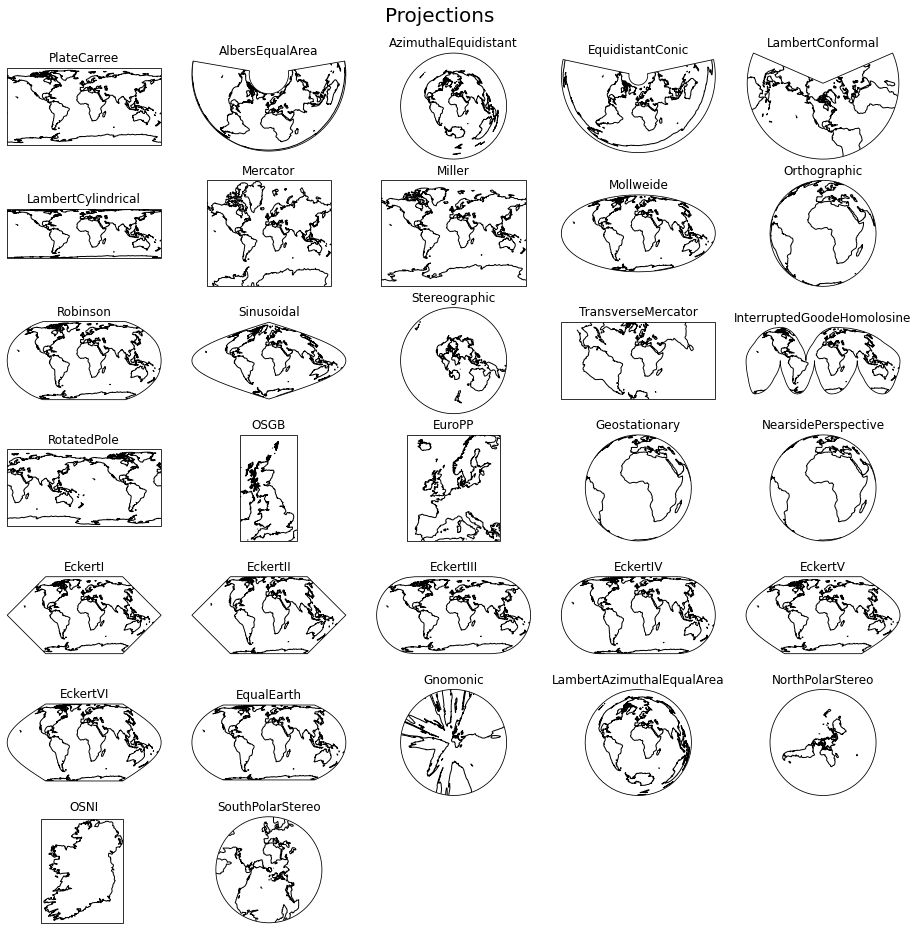

In [4]:
fig = plt.figure(figsize=(16,16))
fig.suptitle('Projections', fontsize=20, y=0.92)

projections = {'PlateCarree': ccrs.PlateCarree(), 'AlbersEqualArea': ccrs.AlbersEqualArea(), 
               'AzimuthalEquidistant': ccrs.AzimuthalEquidistant(), 'EquidistantConic': ccrs.EquidistantConic(), 
               'LambertConformal': ccrs.LambertConformal(), 'LambertCylindrical': ccrs.LambertCylindrical(), 
               'Mercator': ccrs.Mercator(), 'Miller': ccrs.Miller(), 'Mollweide': ccrs.Mollweide(), 
               'Orthographic': ccrs.Orthographic(), 'Robinson': ccrs.Robinson(), 'Sinusoidal': ccrs.Sinusoidal(), 
               'Stereographic': ccrs.Stereographic(), 'TransverseMercator': ccrs.TransverseMercator(), 
               'InterruptedGoodeHomolosine': ccrs.InterruptedGoodeHomolosine(),
               'RotatedPole': ccrs.RotatedPole(), 'OSGB': ccrs.OSGB(), 'EuroPP': ccrs.EuroPP(), 
               'Geostationary': ccrs.Geostationary(), 'NearsidePerspective': ccrs.NearsidePerspective(), 
               'EckertI': ccrs.EckertI(), 'EckertII': ccrs.EckertII(), 'EckertIII': ccrs.EckertIII(), 
               'EckertIV': ccrs.EckertIV(), 'EckertV': ccrs.EckertV(), 'EckertVI': ccrs.EckertVI(), 
               'EqualEarth': ccrs.EqualEarth(), 'Gnomonic': ccrs.Gnomonic(),
               'LambertAzimuthalEqualArea': ccrs.LambertAzimuthalEqualArea(), 
               'NorthPolarStereo': ccrs.NorthPolarStereo(), 'OSNI': ccrs.OSNI(), 
               'SouthPolarStereo': ccrs.SouthPolarStereo()} #, 'Geodetic': ccrs.Geodetic()}

for index, projection in enumerate(projections.items()):
    ax = fig.add_subplot(7, 5, index+1, projection=projection[1])
    ax.set_global()  
    ax.coastlines()
    ax.set_title(projection[0])

Text(0.5, 1.0, 'Geostationary')

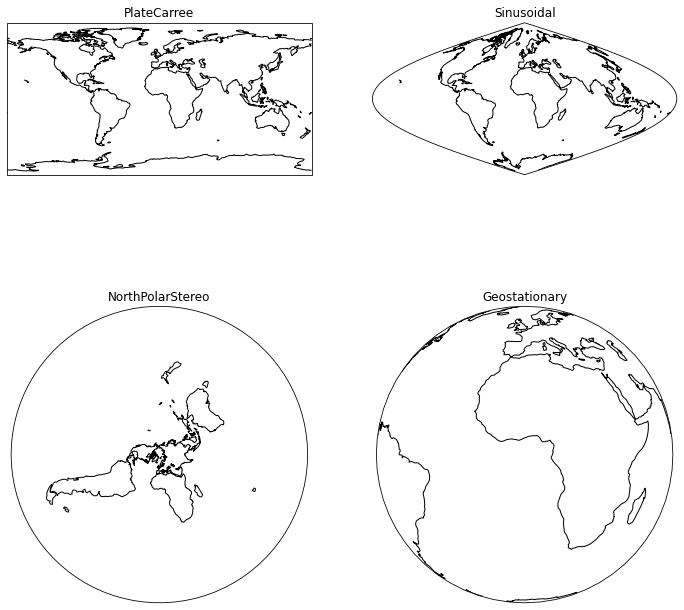

In [5]:
# Make sure the figure is a decent size when plotted.
fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('PlateCarree')

ax2 = fig.add_subplot(2, 2, 2, projection=ccrs.Sinusoidal())
ax2.coastlines()
ax2.set_title('Sinusoidal')

ax1 = fig.add_subplot(2, 2, 3, projection=ccrs.NorthPolarStereo())
ax1.coastlines()
ax1.set_title('NorthPolarStereo')

ax2 = fig.add_subplot(2, 2, 4, projection=ccrs.Geostationary())
ax2.coastlines()
ax2.set_title('Geostationary')

- 三维的地球无法完美地投影到平面上。

- 某些实际地理特性无法保持：
  - Area
  - Shape
  - Direction
  - Distance
  - Scale

> All models (map projections) are wrong, but some are useful. - Phileas Elson (SciPy 2018)

## 添加经纬度标签

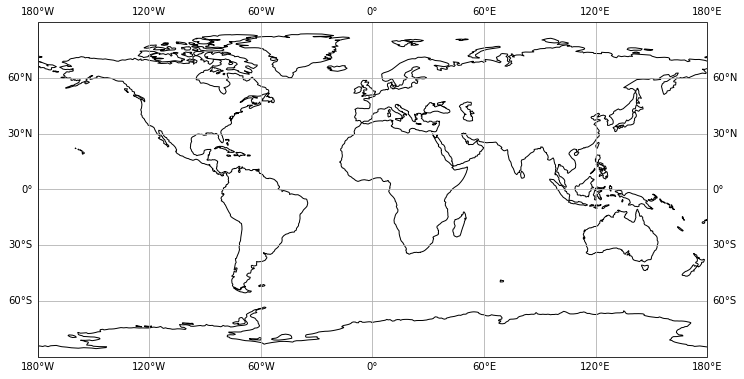

In [6]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# latitude and longitude with east and west, etc.
plt.figure(figsize=(12, 8))
m = plt.axes(projection=ccrs.PlateCarree())
grid_lines = m.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
m.coastlines('110m') # 50m, 10m

我们可以改变地图的中心点，还可以用 `stock_img` 来叠加一个默认的背景图, 用 `nightshade` 来区分夜晚/白天

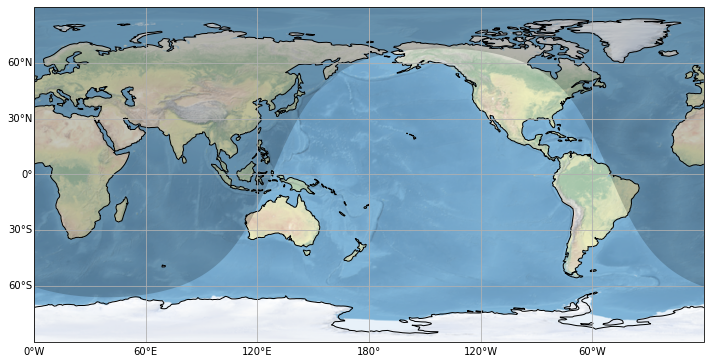

In [7]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import datetime
from cartopy.feature.nightshade import Nightshade

date = datetime.datetime.now()
plt.figure(figsize=(12, 8))
m = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
grid_lines = m.gridlines(draw_labels=True)
#grid_lines.xlabels_top = False     # v0.18 改变
grid_lines.top_labels = False
#grid_lines.ylabels_right = False   # v0.18 改变
grid_lines.right_labels = False
#grid_lines.xlocator = mticker.FixedLocator([0,60,120,180,-180,-120,-60])
grid_lines.xformatter = LongitudeFormatter(zero_direction_label=True)
grid_lines.yformatter = LatitudeFormatter()
m.coastlines()
m.stock_img()
m.add_feature(Nightshade(date, alpha=0.2))

## 地图特性 The Feature Interface

`Cartopy` 可以通过地图特性来添加海岸线、海洋、陆地、河流等信息。

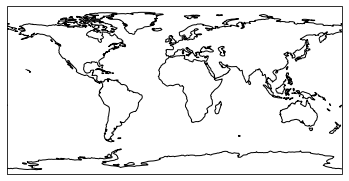

In [8]:
# Add coastlines to the map.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)  # Equivalent to `ax.coastlines()`

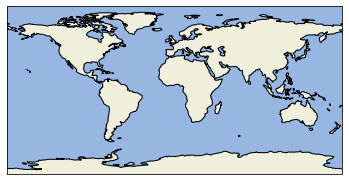

In [9]:
# Add land and ocean features, that come with preset face colours.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)

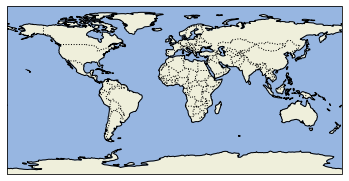

In [10]:
# Add country borders.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.BORDERS, linestyle=':')

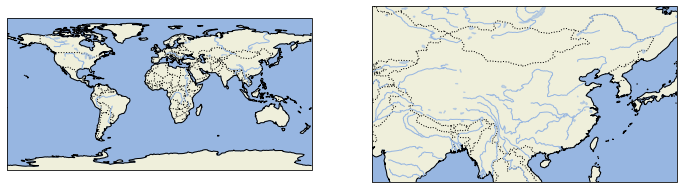

In [11]:
# And finally, add lakes and rivers.
plt.figure(figsize=(12,5))
for i_subplot in (121, 122):
    ax = plt.subplot(i_subplot, projection=ccrs.PlateCarree())
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.BORDERS, linestyle=':')
    ax.add_feature(cfeat.LAKES, alpha=0.5)
    ax.add_feature(cfeat.RIVERS)
    if i_subplot == 122:
        #ax.set_extent((-175, -90, 40, 70))
        ax.set_extent((70, 140, 15, 50))

## 转换参考系 Transforming data

为了绘制地理数据，我们必须在标准的 `matplotlib` 绘图函数中指定``transform`` 参数，来告诉绘图程序所绘制数据的投影方法. 所以
`transform` 的值应该是***所绘制数据的原始投影方法***。

首先我们在 `PlateCarree` 投影里绘制一条线.

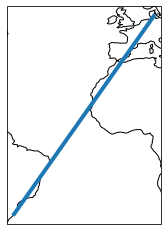

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
x0, y0 = -50, -30 #104, 1.3
x1, y1 = 10, 55 #113, 22
plt.plot([x0, x1], [y0, y1], linewidth=4)

然后在 `EquidistantConic` 投影里绘制同一条线。

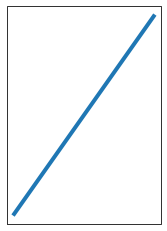

In [13]:
proj = ccrs.EquidistantConic()

ax = plt.axes(projection=proj)
ax.coastlines()
plt.plot([x0, x1], [y0, y1], linewidth=4)

这条线 **并不是** 我们所要的。
我们设置坐标系使用 `Equidistant Conic` 投影, 但是并没有告诉 `Cartopy` 数据所用的是 **`PlateCarree` 投影**.
为此, 我们传递 `transform` 关键词给 `plt.plot` 函数:

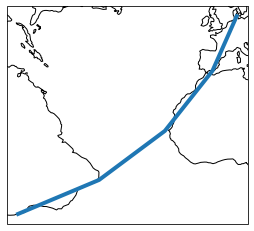

In [14]:
ax = plt.axes(projection=proj)
ax.coastlines()
plt.plot([x0, x1], [y0, y1], linewidth=4, transform=ccrs.PlateCarree())

注意到绘制的线是弯曲的：它 ***在定义它的坐标系里*** 是直的, 而在不同的坐标系（投影）里面变成了曲线。

同时要注意, 除非我们调用 `set_extent` 来设定地图的范围, 否则默认地图只显示我们绘制数据的地方。

我们可以用 `set_global` 方法来绘制全球地图，这样我们就可以看到这条线是从哪里到哪里了：

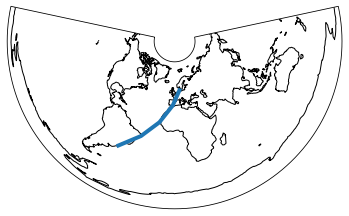

In [15]:
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
plt.plot([x0, x1], [y0, y1], linewidth=4, transform=ccrs.PlateCarree())

### 例子：珠海到伦敦

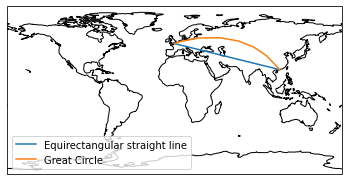

In [16]:
# create some test data
zhuhai = dict(lon=113, lat=22)
london = dict(lon=0, lat=50)
lons = [zhuhai['lon'], london['lon']]
lats = [zhuhai['lat'], london['lat']]

ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line') #, transform=ccrs.PlateCarree())
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

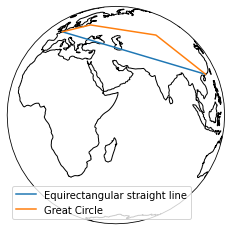

In [17]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=50))
ax.plot(lons, lats, label='Equirectangular straight line', transform=ccrs.PlateCarree())
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

##  绘制二维 (Raster) 数据

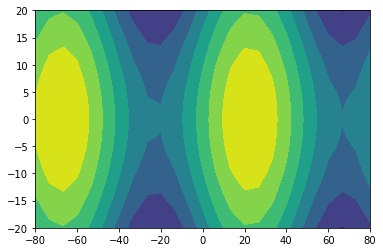

In [18]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(-20, 20, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

现在我们创建一个 `PlateCarree` 投影的图， 不使用 `transform` 关键词来绘制数据. 它凑巧可以工作，因为 `PlateCarree` 是lat / lon 数据的最简单投影方法.

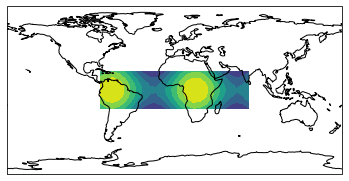

In [19]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

但是，当我们在另一个不同的投影方法下做同样的事情，我们可能得到错误的结果：

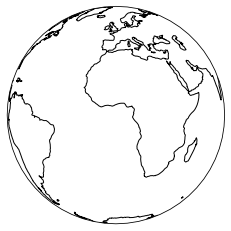

In [20]:
#projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
projection = ccrs.Orthographic()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

要改正它，我们需要给 `contourf` 传递正确的 `transform` 参数：

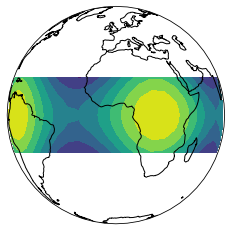

In [21]:
#projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
projection = ccrs.Orthographic()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

## 与 `xarray`结合绘图

In [22]:
import os
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc')

dataset = xr.open_dataset(fname)
#from netCDF4 import Dataset as netcdf_dataset
#dataset = netcdf_dataset(fname) 
#sst = dataset.variables['sst'][0, :, :]
#lats = dataset.variables['lat'][:]
#lons = dataset.variables['lon'][:]

#ax = plt.axes(projection=ccrs.PlateCarree())

#plt.contourf(lons, lats, sst, 60,
#             transform=ccrs.PlateCarree())

#ax.coastlines()

/opt/miniconda3/lib/python3.7/site-packages/xarray/coding/times.py:83: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


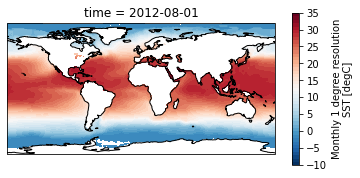

In [23]:
sst = dataset.sst.isel(time=0)

ax = plt.axes(projection=ccrs.PlateCarree())  # 非常关键的语句
sst.plot.contourf(ax=ax,vmin=-10,vmax=35,levels=46,cmap='RdBu_r',
                  transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.7})
ax.coastlines()

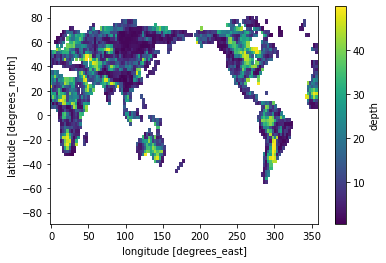

In [24]:
# add_cyclic example
ds = xr.open_dataset("example.nc")
ds['depth'].plot()

In [25]:
ds

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
Data variables:
    depth    (lat, lon) float64 ...

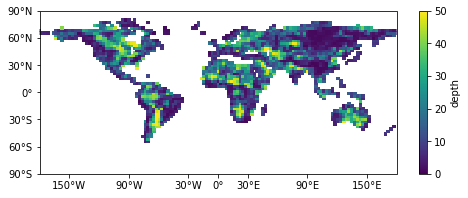

In [26]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111, projection=proj, aspect='auto')

pc = ax.pcolormesh(ds.lon, ds.lat, ds.depth, vmin=0, vmax=50)
cb = plt.colorbar(pc, ax=ax, orientation='vertical')
cb.set_label(ds.depth.name)

ax.set_global()
ax.set_xticks([-150, -90, -30, 0, 30, 90, 150], crs=proj)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

In [27]:
from cartopy.util import add_cyclic_point

data = ds['depth']
lon = ds.coords['lon']

print("Original shape -", data.shape)
lon_idx = data.dims.index('lon')
wrap_data, wrap_lon = add_cyclic_point(data.values, coord=lon, axis=lon_idx)
print("New shape -", wrap_data.shape)

Original shape - (64, 128)
New shape - (64, 129)


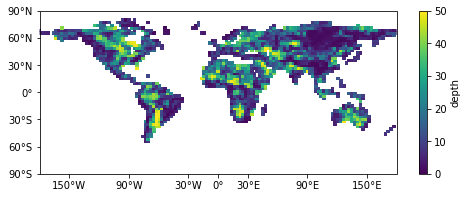

In [28]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111, projection=proj, aspect='auto')

pc = ax.pcolormesh(wrap_lon, ds.lat, wrap_data, vmin=0, vmax=50)
cb = plt.colorbar(pc, ax=ax, orientation='vertical')
cb.set_label(ds.depth.name)

ax.set_global()
ax.set_xticks([-150, -90, -30, 0, 30, 90, 150], crs=proj)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

### 另一种（更好的）解决方案

之前我们学过：`xarray.dataset.assign_coords` 可以用来改变坐标值。

In [29]:
ds_new = ds.assign_coords({'lon':(((ds.lon+180)%360)-180)})
# 或者
# ds_new = ds.assign_coords(lon = (((ds.lon+180)%360)-180))
ds_new

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... -11.25 -8.438 -5.625 -2.812
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
Data variables:
    depth    (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

可以进一步用 `sortby` 来把坐标换成我们习惯的顺序，但并不是必须的。

In [30]:
ds_new = ds.assign_coords({'lon':(((ds.lon+180)%360)-180)}).sortby('lon')
ds_new

<xarray.Dataset>
Dimensions:  (lat: 64, lon: 128)
Coordinates:
  * lon      (lon) float64 -180.0 -177.2 -174.4 -171.6 ... 171.6 174.4 177.2
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
Data variables:
    depth    (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

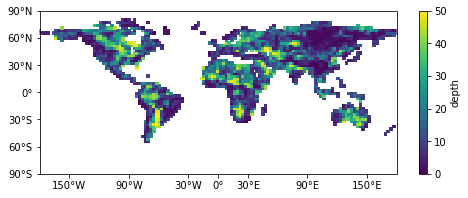

In [31]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111, projection=proj, aspect='auto')

ds_new.depth.plot.pcolormesh(ax=ax,vmin=0,vmax=50)

ax.set_global()
ax.set_xticks([-150, -90, -30, 0, 30, 90, 150], crs=proj)
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=proj)
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

## 展示卫星图像

Text(-117, 33, 'San Diego')

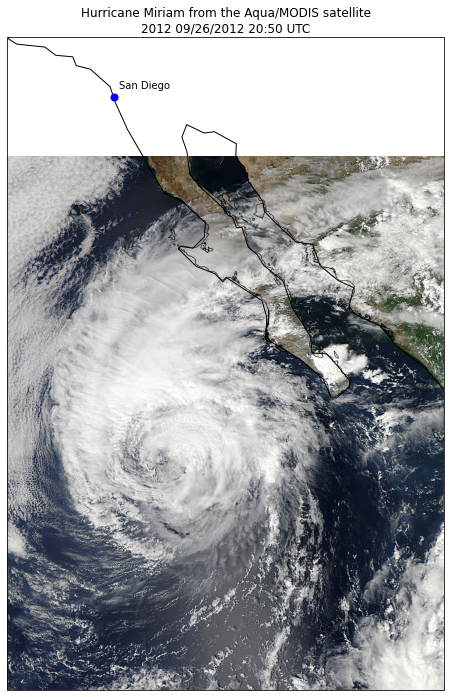

In [32]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='110m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

### 风云卫星图像

风云4A 是我国第二代地球同步卫星。根据 http://fy4.nsmc.org.cn/portal/cn/operation/status.html, 风云4A 卫星高度为 35755 km，中心经度在104.7°E，我们可以据此构建一个同步卫星投影方法，从而将卫星图像叠加到采用任何投影的地图上去。

In [33]:
fy_proj = ccrs.Geostationary(satellite_height=35755000,central_longitude=104.7)
fy_proj

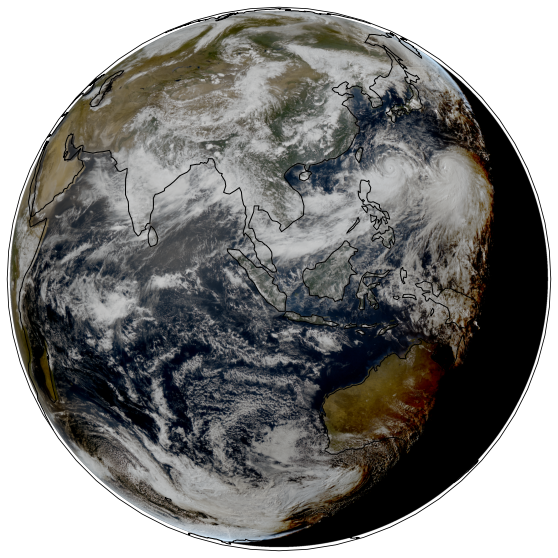

In [34]:
img_fname = 'FY4A_201908070800_composite_true_color.png'
img_extent = fy_proj.x_limits + fy_proj.y_limits

img = plt.imread(img_fname)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=fy_proj)
ax.set_global()
ax.coastlines()

ax.imshow(img, transform=fy_proj,extent=img_extent,origin='upper')

我们可以将此图像投影到其它地图中。

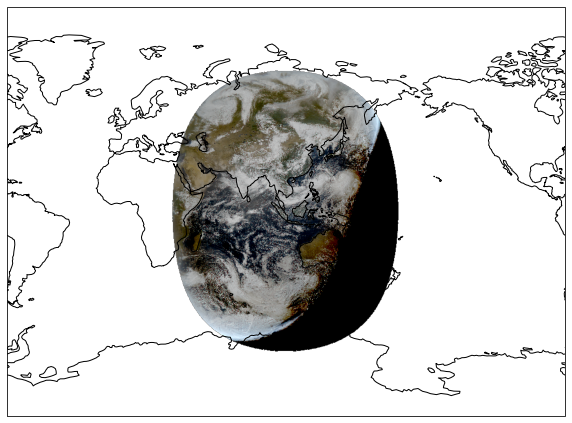

In [35]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.Miller(central_longitude=105.))
ax.set_global()
ax.coastlines()

ax.imshow(img, transform=fy_proj,extent=img_extent,origin='upper')

 我们放大“双台共舞”的区域来看看 2019-09 超强台风利奇马 和 2019-10 强台风罗莎:

/opt/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/opt/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


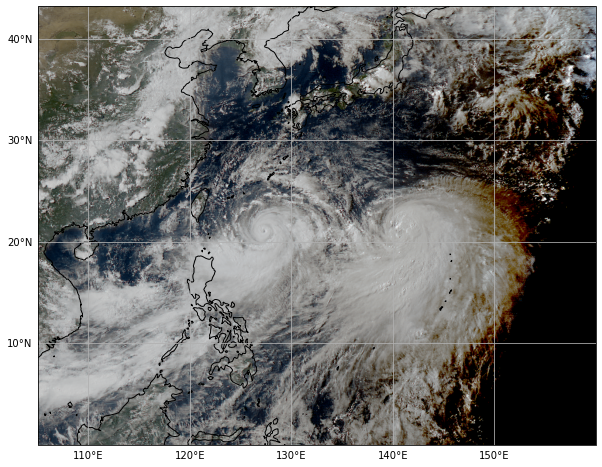

In [36]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([105,160,0,40])
grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xlabels_top = grid_lines.ylabels_right = False
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
ax.imshow(img, transform=fy_proj,extent=img_extent,origin='upper')

 我们看看用 `SatPy` 直接画出来的利奇马：
（参考 https://nbviewer.jupyter.org/github/pytroll/pytroll-examples/blob/master/satpy/FY4A_agri_introduction(zh-CN).ipynb)

![](FY4A_201908070800_resampled_lekima.tif)

## Shapefile

shapefile 文件格式:

- 是数字向量存储格式，用来存储几何形状、位置及相关的信息
- shapefile 里存储的地理信息可以用点、线或者多边形（面积）来表示
- 非拓扑性（topological），即它并不保存相对空间位置信息，例如连接性、相邻性或者面积 
- 最早由 ArcView GIS version 2 于 1990 年代早期引入.

每个 shapefile 包括至少 3 个文件:

- .shp: 主文件，包括主要地理数据以及各个形状的记录 
- .dbf: dBase 数据库文件，存储着每个形状的属性. 它可以让访问空间特性数据变得更快。
- .shx: 将 shapefile 的记录组织起来，以供参考.

### 例子: 单独显示某个国家

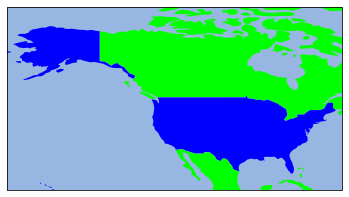

In [37]:
import cartopy.io.shapereader as shapereader
 
shpfilename = shapereader.natural_earth(resolution='110m', \
                                      category='cultural', \
                                      name='admin_0_countries')

reader = shapereader.Reader(shpfilename)
countries = reader.records()

# Select the map projection
#----------------------
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.OCEAN)
 
# Select the area of interest
#-----------------------
ax.set_extent([-170, -65, 20, 70])
 
for c in countries:
    if c.attributes['ADM0_A3'] == 'USA':
        ax.add_geometries([c.geometry], \
                          ccrs.PlateCarree(), \
                          facecolor=(0, 0, 1), \
                          label=c.attributes['ADM0_A3'])
    else:
        #print(type(c.geometry))
        ax.add_geometries([c.geometry],ccrs.PlateCarree(), \
                          facecolor=(0, 1, 0), \
                          label=c.attributes['ADM0_A3'])

### 例子：显示多个国家和地区

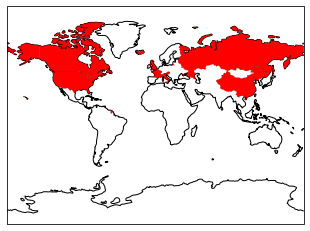

In [38]:
#import cartopy.feature as cfeat

def area(ax, iso, clr) :
    shp = shapereader.natural_earth(resolution='110m',category='cultural',
                                  name='admin_0_countries')
    reader = shapereader.Reader(shp)
    for n in reader.records() :
        if n.attributes['ADM0_A3'] == iso: 
            ax.add_geometries([n.geometry], ccrs.PlateCarree(), facecolor=clr, 
                              alpha = 1.00, linewidth =0.15, edgecolor = "black",
                              label=n.attributes['ADM0_A3']) 
    return ax

iso3 = ['USA','CAN','RUS','GBR','ISL','FRA','ITA','CHN','TWN','AUT']

ax = plt.axes(projection=ccrs.Miller())
ax.add_feature(cfeat.COASTLINE)
#ax.coastlines()

for n in iso3 :
    area(ax, n, "red")

## 中国地图

中国地图常见的错误
![](./China_map_problems.jpg)

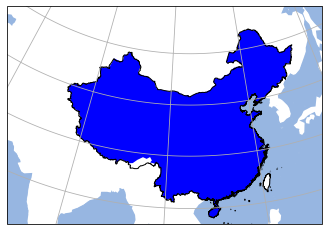

In [39]:
# import cartopy.io.shapereader as shapereader
shpfilename = shapereader.natural_earth(resolution='110m', \
                                      category='cultural', \
                                      name='admin_0_countries')

reader = shapereader.Reader(shpfilename)
countries = reader.records()

# Select the map projection
#----------------------
#ax = plt.axes(projection=ccrs.Mercator())
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105, central_latitude=90,
                             false_easting=400000, false_northing=400000))
ax.add_feature(cfeat.OCEAN)
 
# Select the area of interest
#-----------------------
ax.set_extent([70, 130, 15, 55])
 
for country in countries:
    if country.attributes['ADM0_A3'] == 'CHN':
        ax.add_geometries([country.geometry], \
                          ccrs.PlateCarree(), \
                          facecolor=(0, 0, 1),
                          label=country.attributes['ADM0_A3'])
    else:
        ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                          facecolor=(1, 1, 1), \
                          label=country.attributes['ADM0_A3'])
        
# China
shp = '../shp_file/china_country.shp'
rd = shapereader.Reader(shp)
china = cfeat.ShapelyFeature(rd.geometries(),ccrs.PlateCarree(), edgecolor='k', facecolor='none')
ax.add_feature(china,linewidth=1)
ax.gridlines(draw_labels=False)

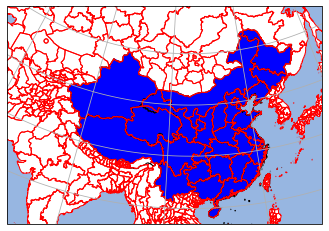

In [40]:
states_provinces = cfeat.NaturalEarthFeature(category='cultural',
                                                name='admin_1_states_provinces',
                                                scale='10m', # 注意：需要较长时间下载数据
                                                facecolor='none')

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=105, central_latitude=90,
                             false_easting=400000, false_northing=400000))
ax.add_feature(cfeat.OCEAN)
 
# Select the area of interest
#-----------------------
ax.set_extent([70, 130, 15, 55])

reader = shapereader.Reader(shpfilename)
countries = reader.records()
for country in countries:
    if country.attributes['ADM0_A3'] == 'CHN':
        ax.add_geometries([country.geometry], \
                          ccrs.PlateCarree(), \
                          facecolor=(0, 0, 1),
                          label=country.attributes['ADM0_A3'])
    else:
        ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                          facecolor=(1, 1, 1), \
                          label=country.attributes['ADM0_A3'])
        
# China provinces 
shp = '../shp_file/china.shp'
rd = shapereader.Reader(shp)
provinces = cfeat.ShapelyFeature(rd.geometries(),ccrs.PlateCarree(), edgecolor='k', facecolor='none')
ax.add_feature(provinces,linewidth=1)
ax.add_feature(states_provinces, linewidth=1, edgecolor='red')
ax.gridlines(draw_labels=False)

### LambertConformal 坐标标注

- 由于 `cartopy` 的局限，对于 `LambertConformal` 投影还无法标注坐标轴 (version <= 0.17)。

- 这个问题在即将发布的 0.18 版本可望得到解决

- Andrew Dawson 提供了一种临时解决方法 https://gist.github.com/ajdawson/dd536f786741e987ae4e

In [41]:
from copy import copy
import shapely.geometry as sgeom

def find_side(ls, side):
    """
    Given a shapely LineString which is assumed to be rectangular, return the
    line corresponding to a given side of the rectangle.
    
    """
    minx, miny, maxx, maxy = ls.bounds
    points = {'left': [(minx, miny), (minx, maxy)],
              'right': [(maxx, miny), (maxx, maxy)],
              'bottom': [(minx, miny), (maxx, miny)],
              'top': [(minx, maxy), (maxx, maxy)],}
    return sgeom.LineString(points[side])

def lambert_xticks(ax, ticks):
    """Draw ticks on the bottom x-axis of a Lambert Conformal projection."""
    te = lambda xy: xy[0]
    lc = lambda t, n, b: np.vstack((np.zeros(n) + t, np.linspace(b[2], b[3], n))).T
    xticks, xticklabels = _lambert_ticks(ax, ticks, 'bottom', lc, te)
    ax.xaxis.tick_bottom()
    ax.set_xticks(xticks)
    ax.set_xticklabels([ax.xaxis.get_major_formatter()(xtick) for xtick in xticklabels])
    
def lambert_yticks(ax, ticks):
    """Draw ricks on the left y-axis of a Lamber Conformal projection."""
    te = lambda xy: xy[1]
    lc = lambda t, n, b: np.vstack((np.linspace(b[0], b[1], n), np.zeros(n) + t)).T
    yticks, yticklabels = _lambert_ticks(ax, ticks, 'left', lc, te)
    ax.yaxis.tick_left()
    ax.set_yticks(yticks)
    ax.set_yticklabels([ax.yaxis.get_major_formatter()(ytick) for ytick in yticklabels])

def _lambert_ticks(ax, ticks, tick_location, line_constructor, tick_extractor):
    """Get the tick locations and labels for an axis of a Lambert Conformal projection."""
    outline_patch = sgeom.LineString(ax.outline_patch.get_path().vertices.tolist())
    axis = find_side(outline_patch, tick_location)
    n_steps = 30
    extent = ax.get_extent(ccrs.PlateCarree())
    _ticks = []
    for t in ticks:
        xy = line_constructor(t, n_steps, extent)
        proj_xyz = ax.projection.transform_points(ccrs.Geodetic(), xy[:, 0], xy[:, 1])
        xyt = proj_xyz[..., :2]
        ls = sgeom.LineString(xyt.tolist())
        locs = axis.intersection(ls)
        if not locs:
            tick = [None]
        else:
            tick = tick_extractor(locs.xy)
        _ticks.append(tick[0])
    # Remove ticks that aren't visible:    
    ticklabels = copy(ticks)
    while True:
        try:
            index = _ticks.index(None)
        except ValueError:
            break
        _ticks.pop(index)
        ticklabels.pop(index)
    return _ticks, ticklabels

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.


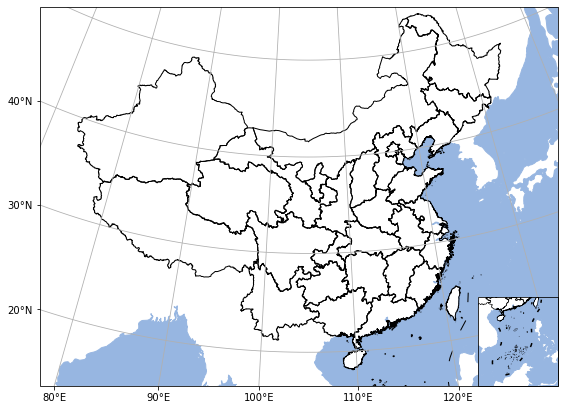

In [42]:
fig = plt.figure(figsize=(9, 8), frameon=True)
ax = fig.add_axes([0.08, 0.05, 0.8, 0.94], 
                  projection=ccrs.LambertConformal(central_longitude=105, central_latitude=90,
                             false_easting=400000, false_northing=400000))
ax.add_feature(cfeat.OCEAN)
 
# Select the area of interest
#-----------------------
ax.set_extent([78, 130, 15, 53])

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
yticks = [0, 10, 20, 30, 40, 50, 60]
ax.gridlines(xlocs=xticks, ylocs=yticks)

ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
lambert_xticks(ax, xticks)
lambert_yticks(ax, yticks)

ax.add_feature(provinces,linewidth=1)
shp = '../shp_file/china_nine_dotted_line.shp'
rd = shapereader.Reader(shp)
nine_dots = cfeat.ShapelyFeature(rd.geometries(),ccrs.PlateCarree(), edgecolor='k', facecolor='none')
ax.add_feature(nine_dots,linewidth=1)

ax_sub = fig.add_axes([0.748,0.19,0.14,0.155], projection=ccrs.LambertConformal(central_longitude=115, central_latitude=12,
                             false_easting=400000, false_northing=400000))
ax_sub.set_extent([105, 125, 0, 25])
ax_sub.add_feature(cfeat.OCEAN)
ax_sub.add_feature(nine_dots,linewidth=1.5)
ax_sub.add_feature(provinces,linewidth=0.5)

在 0.18 版本中，`gridlines` 对象进行了较大的修改，从而可以更好地进行坐标轴标记，但是也还存在一些问题。

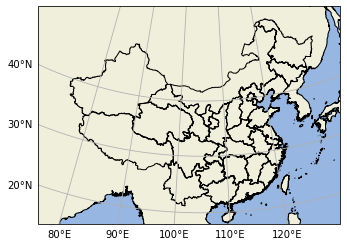

In [43]:
lambert_crs = ccrs.LambertConformal(central_longitude=105) 

ax0 = plt.axes(projection=lambert_crs)
ax0.set_extent([75, 130, 18, 54], crs=ccrs.PlateCarree())
ax0.add_feature(cfeat.LAND)
ax0.add_feature(cfeat.OCEAN)
#ax0.add_feature(cfeat.BORDERS)
ax0.add_feature(provinces,linewidth=1)
gl = ax0.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.xlocator = mticker.FixedLocator([80, 90, 100, 110, 120])
gl.ylocator = mticker.FixedLocator([20, 30, 40])
gl.rotate_labels = False
gl.top_labels = gl.right_labels = False
ax0.coastlines(resolution='10m')